<a href="https://colab.research.google.com/github/Advanced-Research-Centre/QASM/blob/main/Algorithmic%20Hamiltonian%20Complexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%%capture
!pip install pybdm;
!pip install qiskit;

In [46]:
import numpy as np
import scipy as sp
from pybdm import BDM
import qiskit
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit.visualization import plot_bloch_multivector
from qiskit import QuantumCircuit, execute, transpile
import qiskit.quantum_info as qi

def show_figure(fig):
    # See https://github.com/Qiskit/qiskit-terra/issues/1682
    new_fig = plt.figure()
    new_mngr = new_fig.canvas.manager
    new_mngr.canvas.figure = fig
    fig.set_canvas(new_mngr.canvas)
    plt.show(fig)

[[0.-0.j 1.+0.j]
 [1.+0.j 0.-0.j]]


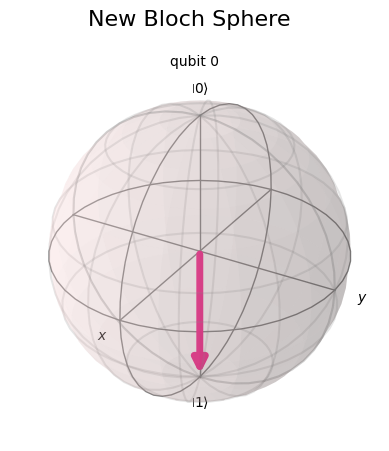

[[1.+0.j 0.-0.j]
 [0.-0.j 1.+0.j]]
[[0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]]


<ipython-input-68-ba531039ddb5>:15: ComplexWarning: Casting complex values to real discards the imaginary part
  U2 = np.array(np.kron(U,np.eye(2)), dtype = int)


26.415903926263844

In [68]:

H = np.array([[-1,1], [1,-1]])
t = 1/2
r = np.pi*t
U = np.round(sp.linalg.expm(r*H*1j),8)
print(U)

qc = QuantumCircuit(1)
qc.unitary(U, [0])
sv = qi.Statevector.from_instruction(qc)
show_figure(plot_bloch_multivector(sv, title="New Bloch Sphere"))

print(U_I)
#Y = np.ones((100,100), dtype = int)

U2 = np.array(np.kron(U,np.eye(2)), dtype = int)
print(U2)
bdm2d = BDM(ndim=2)
bdm2d.bdm(U2)